# CNN

## Convolutional layers?
    1. These are made up of filters
    2. What are these filters?
    

In [30]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2



In [31]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

(100, 100, 3)
(100, 100)


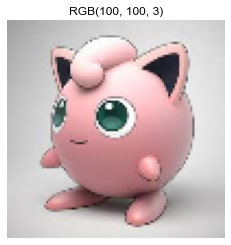

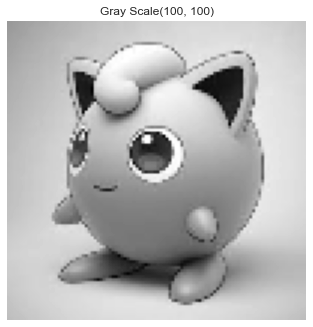

In [33]:
img_ = cv2.imread("center.jpeg")
img_ = cv2.resize(img_,(100,100))
print(img_.shape)
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
drawImg(img,"RGB")
drawImg(img_gray,"Gray Scale")

In [35]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                    
    return new_img

In [36]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)

In [37]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2 = convolution(img_gray,edge_filter)

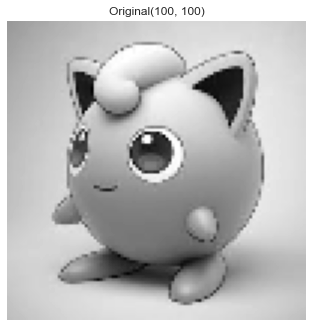

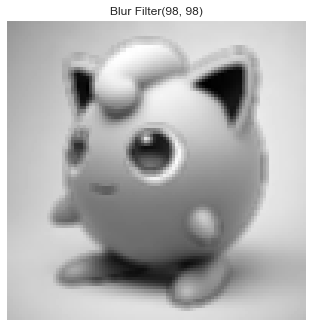

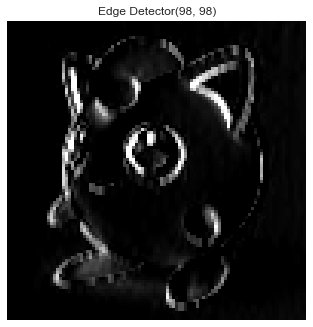

In [38]:
drawImg(img_gray,"Original")
drawImg(output1,"Blur Filter")
drawImg(output2,"Edge Detector")


# Stride
Filters can have different size as well as movement
Stride defines how a filter should move across the image
No of pixels we skip each time is called stride
In our example we used a stride of (1,1) along W and H
You can also use a stride of (2,2) in that case the output volume will have less W and H
Input and Output Sizes: (assuming 0 padding)
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$$$ n_C = n_{C_{prev}}$$


# Padding
Convolution operation we have seen reduces "H" and "W" of original image
But sometimes we want the output image to have same size as input image
So we can achieve this by adding 0 value pixels(neurons) outside the original image
This is called Padding
Input and Output Sizes after Convolution: (with padding)

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_C = \text{number of filters used in the convolution}$$

### Padding example using numpy

In [39]:
pad_img = np.pad(img, ((10,10), (10,10), (0,0)), 'constant', constant_values =200)
##first tuple is for row second for column and third for channel

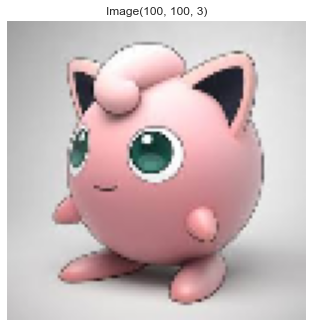

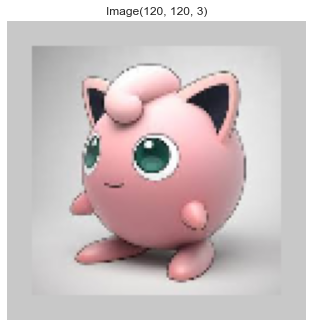

In [40]:
drawImg(img)
drawImg(pad_img)
